Importing the essential libraries to be used throughout the project


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


Loading our stock data in the variable called sp500. I am currently loading all historical data available on the stock.

In [ ]:
sp500 = yf.Ticker("NVDA")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401374,0.447962,0.355980,0.376288,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406152,0.420487,0.376288,0.415709,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420487,0.428849,0.377482,0.383456,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384650,0.394207,0.363148,0.382261,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382261,0.384650,0.378677,0.381067,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,461.480011,461.630005,443.119995,451.779999,47396600,0.0,0.0
2023-09-12 00:00:00-04:00,447.380005,456.730011,445.309998,448.700012,34925600,0.0,0.0
2023-09-13 00:00:00-04:00,446.000000,459.299988,445.029999,454.850006,39835500,0.0,0.0


Viewing the data in a line graph

<Axes: xlabel='Date'>

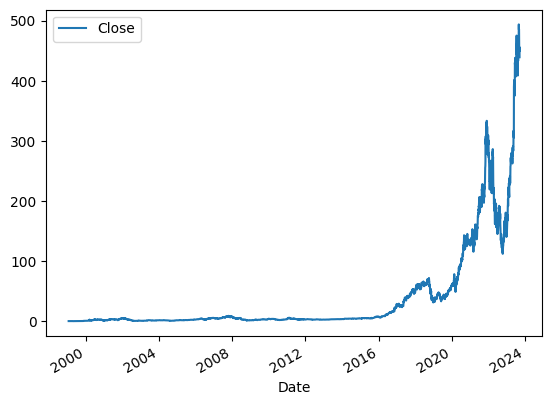

In [ ]:
sp500.plot.line(y="Close", use_index=True)



The Dividends and Stock Split column do not show us anything, therefore we will get rid of it.

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Now for everyday, we want to know if the stock price increased or not the next day.

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1999-01-22 00:00:00-05:00,0.401374,0.447962,0.355980,0.376288,271468800,0.415709
1999-01-25 00:00:00-05:00,0.406152,0.420487,0.376288,0.415709,51048000,0.383456
1999-01-26 00:00:00-05:00,0.420487,0.428849,0.377482,0.383456,34320000,0.382261
1999-01-27 00:00:00-05:00,0.384650,0.394207,0.363148,0.382261,24436800,0.381067
1999-01-28 00:00:00-05:00,0.382261,0.384650,0.378677,0.381067,22752000,0.363147
...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,461.480011,461.630005,443.119995,451.779999,47396600,448.700012
2023-09-12 00:00:00-04:00,447.380005,456.730011,445.309998,448.700012,34925600,454.850006
2023-09-13 00:00:00-04:00,446.000000,459.299988,445.029999,454.850006,39835500,455.809998


Now we have a Tomorrow column that just coppies over the close price of next day. But lets make it even more easy and convert Tomorrow to be a boolean which shows 1 if the price increased and 0 if not.

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401374,0.447962,0.355980,0.376288,271468800,0.415709,1
1999-01-25 00:00:00-05:00,0.406152,0.420487,0.376288,0.415709,51048000,0.383456,0
1999-01-26 00:00:00-05:00,0.420487,0.428849,0.377482,0.383456,34320000,0.382261,0
1999-01-27 00:00:00-05:00,0.384650,0.394207,0.363148,0.382261,24436800,0.381067,0
1999-01-28 00:00:00-05:00,0.382261,0.384650,0.378677,0.381067,22752000,0.363147,0
1999-01-29 00:00:00-05:00,0.381067,0.382261,0.363147,0.363147,24403200,0.370315,1
1999-02-01 00:00:00-05:00,0.363147,0.372704,0.363147,0.370315,15470400,0.341646,0
1999-02-02 00:00:00-05:00,0.363147,0.372704,0.330894,0.341646,26409600,0.348813,1
1999-02-03 00:00:00-05:00,0.336868,0.353592,0.334478,0.348813,7512000,0.367926,1


We have too much old data. Old data is useful but if it dates way too back, it can affect our analysis and ML models because the market undergo significant changes over large period of time. I am taking data after 2005 since computers started to become highly accessible around that period.

In [ ]:
sp500 = sp500.loc["2005-01-01":].copy()
sp500.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2005-01-03 00:00:00-05:00,1.863904,1.889897,1.795097,1.802742,106671600,1.717880,0
2005-01-04 00:00:00-05:00,1.815739,1.818797,1.690357,1.717880,79022400,1.733935,1
2005-01-05 00:00:00-05:00,1.699532,1.754577,1.690357,1.733935,72481200,1.717116,0
2005-01-06 00:00:00-05:00,1.764516,1.785158,1.704883,1.717116,56356800,1.684241,0
2005-01-07 00:00:00-05:00,1.720938,1.733935,1.659012,1.684241,76309200,1.688063,1
2005-01-10 00:00:00-05:00,1.689593,1.704883,1.678125,1.688063,57955200,1.636076,0
2005-01-11 00:00:00-05:00,1.672009,1.681183,1.610847,1.636076,109338000,1.622314,0
2005-01-12 00:00:00-05:00,1.650602,1.656718,1.582560,1.622314,105780000,1.639134,1
2005-01-13 00:00:00-05:00,1.626137,1.681947,1.590204,1.639134,89876400,1.644486,1


I am going to use Random Forest Classifier algorithm. As a decision tree algorithm, Random Forests are less influenced by outliers than other algorithms. I am going to use Closing price, Volume, Opening Price, High and Low as my predictors

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds



array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-04-25 00:00:00-04:00    0
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    1
2023-05-01 00:00:00-04:00    1
                            ..
2023-09-11 00:00:00-04:00    0
2023-09-12 00:00:00-04:00    0
2023-09-13 00:00:00-04:00    0
2023-09-14 00:00:00-04:00    0
2023-09-15 00:00:00-04:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"],preds)

0.5

Not a good precision score. Its as good as flipping a coin to predict if the stock would go up or not.

<Axes: xlabel='Date'>

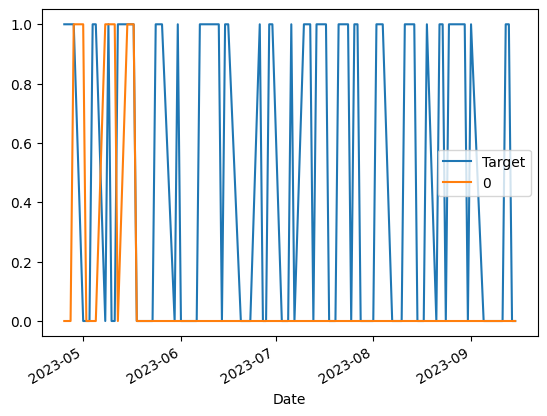

In [ ]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

Now we will work on some back testing to improve. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, I will have the confidence to employ it going forward.

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=25):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)



In [ ]:
predictions = backtest(sp500, model, predictors)


In [ ]:
predictions["Predictions"].value_counts()

1    1233
0     975
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5482562854825629

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.540761
0    0.459239
Name: Target, dtype: float64

This improved our model a bit. But now I want to try to improve it further. I think that my predictors are not good enough to be able to be able to predict. I want to use ratios of closing price over time. Also I need something to show the trend in NVIDIA stock

In [ ]:
horizons = [2,5,60,250,1000]

new_predictors = []
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [ ]:
sp500.head(15)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00-05:00,1.863904,1.889897,1.795097,1.802742,106671600,1.717880,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04 00:00:00-05:00,1.815739,1.818797,1.690357,1.717880,79022400,1.733935,1,0.975896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05 00:00:00-05:00,1.699532,1.754577,1.690357,1.733935,72481200,1.717116,0,1.004651,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06 00:00:00-05:00,1.764516,1.785158,1.704883,1.717116,56356800,1.684241,0,0.995126,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07 00:00:00-05:00,1.720938,1.733935,1.659012,1.684241,76309200,1.688064,1,0.990335,0.0,0.972885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10 00:00:00-05:00,1.689593,1.704883,1.678125,1.688064,57955200,1.636076,0,1.001134,1.0,0.988185,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-11 00:00:00-05:00,1.672009,1.681183,1.610847,1.636076,109338000,1.622315,0,0.984360,1.0,0.967013,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12 00:00:00-05:00,1.650603,1.656718,1.582560,1.622315,105780000,1.639135,1,0.995777,0.0,0.971701,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13 00:00:00-05:00,1.626137,1.681947,1.590205,1.639135,89876400,1.644486,1,1.005157,1.0,0.991033,2.0,NaN,NaN,NaN,NaN,NaN,NaN


Because I am using rolling avergaes, some initial values give NAN because we dont have enough data before that. I will have to drop the NAN values

In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2008-12-22 00:00:00-05:00,1.983934,1.988521,1.768339,1.839439,52246400,1.814210,0,0.969771,1.0,0.928241,3.0,1.024833,27.0,0.490075,109.0,0.448600,499.0
2008-12-23 00:00:00-05:00,1.850907,1.889897,1.786687,1.814210,37745200,1.770632,0,0.993095,0.0,0.936538,2.0,1.015513,27.0,0.486592,109.0,0.442437,499.0
2008-12-24 00:00:00-05:00,1.777513,1.821091,1.733935,1.770632,14661600,1.722467,0,0.987844,0.0,0.950037,1.0,0.997502,26.0,0.478089,109.0,0.431806,498.0
2008-12-26 00:00:00-05:00,1.770632,1.793568,1.674302,1.722467,22615600,1.777513,1,0.986211,0.0,0.946321,1.0,0.976466,26.0,0.468158,109.0,0.420059,498.0
2008-12-29 00:00:00-05:00,1.745403,1.777513,1.633018,1.777513,46016800,1.839439,1,1.015727,1.0,0.995888,1.0,1.011133,27.0,0.486181,110.0,0.433473,499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-08 00:00:00-04:00,459.420013,466.059998,452.709991,455.720001,47306900,451.779999,0,0.992713,0.0,0.965824,1.0,1.020652,29.0,1.703451,134.0,2.531640,541.0
2023-09-11 00:00:00-04:00,461.480011,461.630005,443.119995,451.779999,47396600,448.700012,0,0.995658,0.0,0.971169,1.0,1.011004,28.0,1.681012,133.0,2.504080,541.0
2023-09-12 00:00:00-04:00,447.380005,456.730011,445.309998,448.700012,34925600,454.850006,1,0.996580,0.0,0.980028,0.0,1.003280,28.0,1.661701,133.0,2.481429,541.0


To make our model more trustworthy I will take instead the probability of the stock performing better the next day. To be extra sure, I will take 1 as my final output if the probability is more than 60%.

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
  model.fit(train[new_predictors], train["Target"])
  preds = model.predict_proba(test[new_predictors])[:,1]
  preds[preds >= 0.6] = 1
  preds[preds < 0.6] = 0
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()
predictions

,Target,Predictions
Date,,
2018-11-27 00:00:00-05:00,1,0.0
2018-11-28 00:00:00-05:00,0,0.0
2018-11-29 00:00:00-05:00,1,0.0
2018-11-30 00:00:00-05:00,1,0.0
2018-12-03 00:00:00-05:00,0,0.0
...,...,...
2023-09-08 00:00:00-04:00,0,0.0
2023-09-11 00:00:00-04:00,0,0.0
2023-09-12 00:00:00-04:00,1,0.0


1 ---> 1233

0 ----> 975

this is the previous model's response

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5920398009950248

Our Model's accuracy went up from 0.5 to 0.592, this might not be a huge jump but this is also because we are just using past data as our parameters.

